In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## reading the data

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv")

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
# only one missing value so drop it
data=data.dropna()

In [7]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [8]:
data.head()


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [9]:
data.x

0      24.0
1      50.0
2      15.0
3      38.0
4      87.0
       ... 
695    58.0
696    93.0
697    82.0
698    66.0
699    97.0
Name: x, Length: 699, dtype: float64

## splitting data

In [10]:
train_input=np.array(data.x[0:500]).reshape(500,1)

In [11]:
train_input

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [12]:
train_output=np.array(data.y[0:500]).reshape(500,1)

In [13]:
train_output

array([[ 21.54945196],
       [ 47.46446305],
       [ 17.21865634],
       [ 36.58639803],
       [ 87.28898389],
       [ 32.46387493],
       [ 10.78089683],
       [ 80.7633986 ],
       [ 24.61215147],
       [  6.96331907],
       [ 11.23757338],
       [ 13.53290206],
       [ 24.60323899],
       [ 39.40049976],
       [ 48.43753838],
       [ 61.69900319],
       [ 26.92832418],
       [ 70.4052055 ],
       [ 29.34092408],
       [ 25.30895192],
       [ 69.02934339],
       [ 84.99484703],
       [ 57.04310305],
       [ 50.5921991 ],
       [ 83.02772202],
       [ 57.05752706],
       [ 47.95883341],
       [ 24.34226432],
       [ 94.68488281],
       [ 48.03970696],
       [  7.08132338],
       [ 21.99239907],
       [ 42.33151664],
       [  0.32908944],
       [ 61.92303698],
       [ 91.17716423],
       [ 39.45358014],
       [  5.99606961],
       [ 22.59015942],
       [ 61.18044414],
       [ 85.02778957],
       [ -1.28631089],
       [ 61.94273962],
       [ 21

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [15]:
#train_input=np.array(data.x[0:500]).reshape(500,1)
#train_output=np.array(data.y[0:500]).reshape(500,1)
# validation test input and output
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [16]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


In [17]:
type(train_input)

numpy.ndarray

# <font color=green>Linear regression</font>

## forward propogation

f(x)=m*x+c

In [18]:
def forward_propogation(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    predections=np.multiply(train_input,m)+c
    return predections
    

# cost functions

In [19]:
def cost_function(train_output,predections):
    cost=np.mean((train_output-predections)**2)*0.5
    return cost

# gradient descent for backward propogation

In [20]:
def backward_propogation(train_input,train_output,predections):
    derivative=dict()
    # calculating del(cost)/del(m)
    derivative["dm"]=np.mean(np.multiply(predections-train_output,train_input))
    # calculating del(cost)/del(c)
    derivative["dc"]=np.mean(predections-train_output)
    return derivative
    

# update parameters

In [21]:
def update_parameters(parameters,derivatives,learningrate):
    parameters["m"]=parameters["m"]-learningrate*derivatives["dm"]
    parameters["c"]=parameters["c"]-learningrate*derivatives["dc"]
    return parameters
    

In [22]:
np.random.uniform(0,1)

0.8178662362013455

# train model

In [40]:
loss=list()
def train(train_input,train_output,learningrate,iters):
    # random parameter
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    # see how the errors is reduced
   # loss=list()
    # iterations
    for i in range(iters):
        # forward propogation
        predections= forward_propogation(train_input,parameters)
        # calculating errors
        cost=cost_function(train_output,predections)
        loss.append(cost)
       # print(iters" iteration cost =",cost)
        # calculating errors(back propogations)
        error=backward_propogation(train_input,train_output,predections)
        # updating parameters
        parameters= update_parameters(parameters,error,learningrate)
    return parameters    
        

In [41]:
 parameters=train(train_input,train_output,0.0001,20)

In [42]:
parameters

{'m': 0.9885634446156754, 'c': 0.5732274701195353}

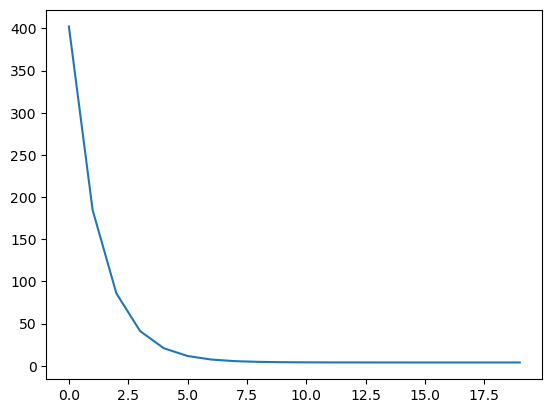

In [43]:
plt.plot(loss)

In [44]:
loss

[402.3187168780332,
 184.71378109830613,
 85.98617843460286,
 41.19335347918782,
 20.870796910520212,
 11.650428213312175,
 7.467134450740636,
 5.569167165399904,
 4.708055034215011,
 4.317365235048554,
 4.140106569092446,
 4.0596818447934035,
 4.023190787195849,
 4.006632482957902,
 3.999117691111944,
 3.995705950969591,
 3.9941557700442574,
 3.993450180712004,
 3.9931277836354138,
 3.9929792414240217]

# let's predict

In [45]:
test_predections=test_input*parameters["m"]+parameters["c"]

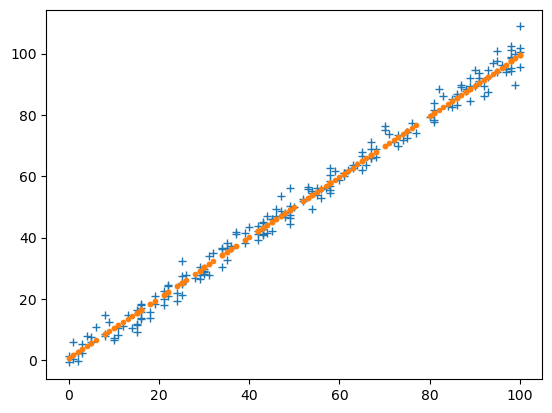

In [46]:
plt.plot(test_input,test_output,"+")
plt.plot(test_input,test_predections,".")
plt.show()

# calculation error in model

In [48]:
 cost_function(test_output,test_predections)

4.010624472366086

# from module

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr_model=LinearRegression()# loading the model

In [51]:
lr_model.fit(train_input,train_output)# giving training data

LinearRegression()

In [52]:
lr_model.coef_# value of m

array([[1.0009993]])

In [53]:
lr_model.intercept_# value of c

array([-0.23603461])

In [54]:
test_predections=lr_model.predict(test_input)

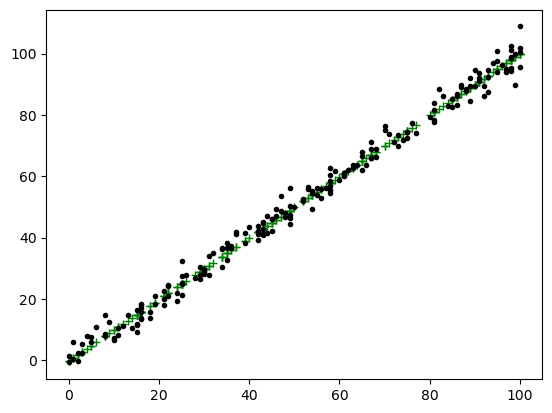

In [56]:
plt.plot(test_input,test_predections,"+",color="green")
plt.plot(test_input,test_output,".",color="black")
plt.show()

In [59]:
# error
from sklearn.metrics import mean_squared_error

In [61]:
cost=mean_squared_error(test_output,test_predections)
print(cost)

8.030031591835371
